In [1]:
# Machine learning 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 

# For data manipulation 
import pandas as pd 
import numpy as np 

# To plot 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-darkgrid') 

# To ignore warnings 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('RELIANCE.csv') 
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-19,2581.000000,2604.000000,2566.699951,2599.300049,2590.150391,3567363
1,2022-12-20,2583.899902,2626.000000,2566.000000,2621.800049,2612.571289,3446291
2,2022-12-21,2621.000000,2633.000000,2576.100098,2584.500000,2575.402588,3935463
3,2022-12-22,2598.000000,2604.649902,2566.750000,2577.800049,2568.726074,3438692
4,2022-12-23,2563.300049,2590.500000,2492.250000,2502.199951,2493.392090,4733657
...,...,...,...,...,...,...,...
241,2023-12-11,2456.000000,2467.600098,2452.399902,2459.350098,2459.350098,3533069
242,2023-12-12,2460.000000,2464.949951,2420.149902,2424.050049,2424.050049,4598562
243,2023-12-13,2422.000000,2438.350098,2406.300049,2433.949951,2433.949951,5015591
244,2023-12-14,2454.000000,2474.949951,2442.649902,2464.149902,2464.149902,8486177


In [3]:
# Changes The Date column as index columns 
df.index = pd.to_datetime(df['Date']) 
df 

# drop The original date column 
df = df.drop(['Date'], axis='columns') 
df 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-19,2581.000000,2604.000000,2566.699951,2599.300049,2590.150391,3567363
2022-12-20,2583.899902,2626.000000,2566.000000,2621.800049,2612.571289,3446291
2022-12-21,2621.000000,2633.000000,2576.100098,2584.500000,2575.402588,3935463
2022-12-22,2598.000000,2604.649902,2566.750000,2577.800049,2568.726074,3438692
2022-12-23,2563.300049,2590.500000,2492.250000,2502.199951,2493.392090,4733657
...,...,...,...,...,...,...
2023-12-11,2456.000000,2467.600098,2452.399902,2459.350098,2459.350098,3533069
2023-12-12,2460.000000,2464.949951,2420.149902,2424.050049,2424.050049,4598562
2023-12-13,2422.000000,2438.350098,2406.300049,2433.949951,2433.949951,5015591


In [4]:
# Create predictor variables 
df['Open-Close'] = df.Open - df.Close 
df['High-Low'] = df.High - df.Low 

# Store all predictor variables in a variable X 
X = df[['Open-Close', 'High-Low']] 
X.head() 

,Open-Close,High-Low
Date,,
2022-12-19,-18.300049,37.300049
2022-12-20,-37.900147,60.000000
2022-12-21,36.500000,56.899902
2022-12-22,20.199951,37.899902
2022-12-23,61.100098,98.250000


In [5]:
# Target variables 
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0) 
y

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0])

In [6]:
split_percentage = 0.8
split = int(split_percentage*len(df)) 

# Train data set 
X_train = X[:split] 
y_train = y[:split] 

# Test data set 
X_test = X[split:] 
y_test = y[split:]

In [7]:
# Support vector classifier 
cls = SVC().fit(X_train, y_train)

In [8]:
df['Predicted_Signal'] = cls.predict(X)

In [9]:
print(df['Predicted_Signal'])

Date
2022-12-19    1
2022-12-20    0
2022-12-21    0
2022-12-22    0
2022-12-23    0
             ..
2023-12-11    1
2023-12-12    0
2023-12-13    1
2023-12-14    1
2023-12-15    1
Name: Predicted_Signal, Length: 246, dtype: int32


In [10]:
# Calculate daily returns 
df['Return'] = df.Close.pct_change()

In [11]:
# Calculate strategy returns 
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

In [12]:
# Calculate Cumulutive returns 
df['Cum_Ret'] = df['Return'].cumsum() 
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2022-12-19,2581.000000,2604.000000,2566.699951,2599.300049,2590.150391,3567363,-18.300049,37.300049,1,NaN,NaN,NaN
2022-12-20,2583.899902,2626.000000,2566.000000,2621.800049,2612.571289,3446291,-37.900147,60.000000,0,0.008656,0.008656,0.008656
2022-12-21,2621.000000,2633.000000,2576.100098,2584.500000,2575.402588,3935463,36.500000,56.899902,0,-0.014227,-0.000000,-0.005571
2022-12-22,2598.000000,2604.649902,2566.750000,2577.800049,2568.726074,3438692,20.199951,37.899902,0,-0.002592,-0.000000,-0.008163
2022-12-23,2563.300049,2590.500000,2492.250000,2502.199951,2493.392090,4733657,61.100098,98.250000,0,-0.029327,-0.000000,-0.037490
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-11,2456.000000,2467.600098,2452.399902,2459.350098,2459.350098,3533069,-3.350098,15.200196,1,0.001466,0.001466,-0.037335
2023-12-12,2460.000000,2464.949951,2420.149902,2424.050049,2424.050049,4598562,35.949951,44.800049,0,-0.014353,-0.014353,-0.051689
2023-12-13,2422.000000,2438.350098,2406.300049,2433.949951,2433.949951,5015591,-11.949951,32.050049,1,0.004084,0.000000,-0.047605


In [13]:
# Plot Strategy Cumulative returns 
df['Cum_Strategy'] = df['Strategy_Return'].cumsum() 
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2022-12-19,2581.000000,2604.000000,2566.699951,2599.300049,2590.150391,3567363,-18.300049,37.300049,1,NaN,NaN,NaN,NaN
2022-12-20,2583.899902,2626.000000,2566.000000,2621.800049,2612.571289,3446291,-37.900147,60.000000,0,0.008656,0.008656,0.008656,0.008656
2022-12-21,2621.000000,2633.000000,2576.100098,2584.500000,2575.402588,3935463,36.500000,56.899902,0,-0.014227,-0.000000,-0.005571,0.008656
2022-12-22,2598.000000,2604.649902,2566.750000,2577.800049,2568.726074,3438692,20.199951,37.899902,0,-0.002592,-0.000000,-0.008163,0.008656
2022-12-23,2563.300049,2590.500000,2492.250000,2502.199951,2493.392090,4733657,61.100098,98.250000,0,-0.029327,-0.000000,-0.037490,0.008656
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-11,2456.000000,2467.600098,2452.399902,2459.350098,2459.350098,3533069,-3.350098,15.200196,1,0.001466,0.001466,-0.037335,0.181646
2023-12-12,2460.000000,2464.949951,2420.149902,2424.050049,2424.050049,4598562,35.949951,44.800049,0,-0.014353,-0.014353,-0.051689,0.167293
2023-12-13,2422.000000,2438.350098,2406.300049,2433.949951,2433.949951,5015591,-11.949951,32.050049,1,0.004084,0.000000,-0.047605,0.167293


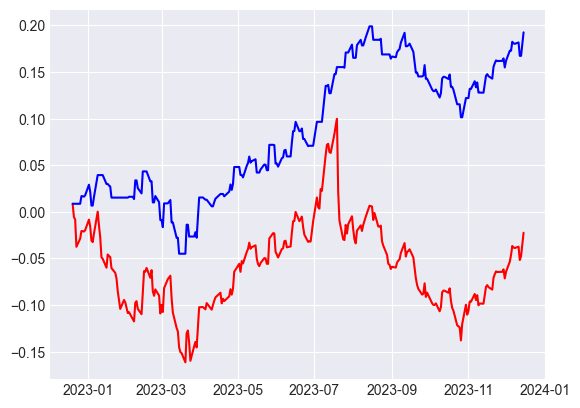

In [14]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.plot(df['Cum_Ret'],color='red') 
plt.plot(df['Cum_Strategy'],color='blue')